In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Base_M43_Pratique_CREDIT_CARD_FRAUD.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#### DATASET JA ESTRUTURADO, ENTÃO NÃO HÁ NECESSIDADE DE TRATAMENTO DE DADOS ####

#### Criação de FEATURES ###


In [7]:
df["Amount_Faixas"] = pd.qcut(df["Amount"], 5, labels=["Muito Baixo","Baixo", "Médio", "Alto", "Muito Alto"])
print(df["Amount_Faixas"].unique)

<bound method Series.unique of 0          Muito Alto
1         Muito Baixo
2          Muito Alto
3          Muito Alto
4                Alto
             ...     
284802    Muito Baixo
284803          Médio
284804           Alto
284805          Baixo
284806     Muito Alto
Name: Amount_Faixas, Length: 284807, dtype: category
Categories (5, object): ['Muito Baixo' < 'Baixo' < 'Médio' < 'Alto' < 'Muito Alto']>


In [8]:
print(df["Time"].value_counts())

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
172760.0     1
172758.0     1
172757.0     1
172756.0     1
172754.0     1
Name: count, Length: 124592, dtype: int64


C:\Users\thiag\AppData\Local\Temp\ipykernel_37052\2338059509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraude_rate = (df.groupby("Amount_Faixas")["Class"].mean())


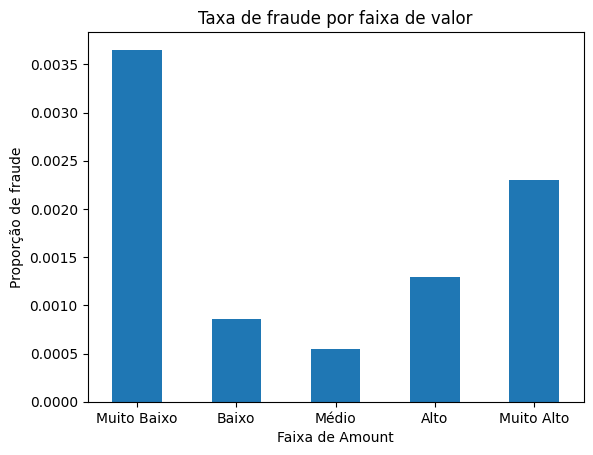

In [9]:
fraude_rate = (df.groupby("Amount_Faixas")["Class"].mean())

plt.figure()
fraude_rate.plot(kind="bar")

plt.title("Taxa de fraude por faixa de valor")
plt.xlabel("Faixa de Amount")
plt.ylabel("Proporção de fraude")
plt.xticks(rotation=0)
plt.show()


In [10]:
corr = df.corr(numeric_only=True)["Class"].abs().sort_values(ascending=False)
corr.head(10)


Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64

In [11]:
### Criando interações das 5 variaveis com maior correlação com a variável alvo 'Class' ###
corr = df.corr(numeric_only=True)["Class"].abs().sort_values(ascending=False)    
top_features = corr.drop("Amount").head(5).index
for feature in top_features:
    df[f"{feature}_x_Amount"] = df[feature] * df["Amount"]



In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,Amount_Faixas,Class_x_Amount,V17_x_Amount,V14_x_Amount,V12_x_Amount,V10_x_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.133558,-0.021053,149.62,0,Muito Alto,0.0,31.116657,-46.557159,-92.435364,13.584624
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.008983,0.014724,2.69,0,Muito Baixo,0.0,-0.308825,-0.386747,2.865483,-0.449161
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.055353,-0.059752,378.66,0,Muito Alto,0.0,420.301005,-62.837083,25.023248,78.626047
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.062723,0.061458,123.50,0,Muito Alto,0.0,-84.485459,-35.558583,22.011186,-6.786562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.219422,0.215153,69.99,0,Alto,0.0,-16.589956,-78.365692,37.668307,52.707679


In [13]:
drop_columns = ['Class_x_Amount']

In [14]:
### elevar o valor absoluto das colunas PCA ao quadrado e somar para obter a norma, visando visualizar componentes e comportamentos mais importantes; quanto maior, mais estranho a transação ###
pca_cols = [f"V{i}" for i in range(1, 29)]
df["PCA_norm"] = (df[pca_cols]**2).sum(axis=1)**0.5 
 

In [15]:
### contar o número de componentes PCA com valor absoluto maior que 2 ###
df["PCA_extreme_count"] = (df[pca_cols].abs() > 2).sum(axis=1)


In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Class,Amount_Faixas,Class_x_Amount,V17_x_Amount,V14_x_Amount,V12_x_Amount,V10_x_Amount,PCA_norm,PCA_extreme_count
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,0,Muito Alto,0.0,31.116657,-46.557159,-92.435364,13.584624,3.911559,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,0,Muito Baixo,0.0,-0.308825,-0.386747,2.865483,-0.449161,2.674524,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,0,Muito Alto,0.0,420.301005,-62.837083,25.023248,78.626047,6.080512,3
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,0,Muito Alto,0.0,-84.485459,-35.558583,22.011186,-6.786562,4.284356,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,0,Alto,0.0,-16.589956,-78.365692,37.668307,52.707679,3.565131,0


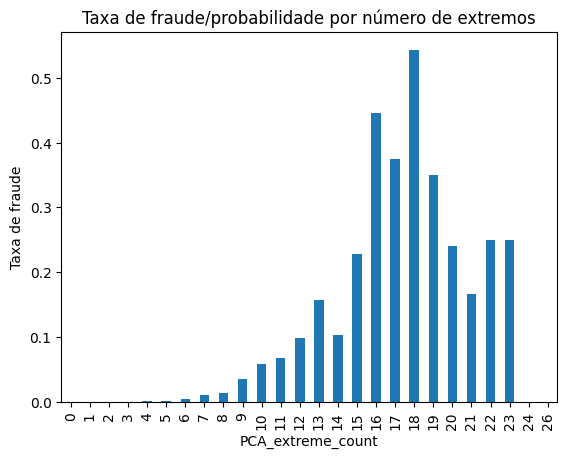

In [17]:
#### Analisando a taxa de fraude em relação ao número de componentes PCA extremos ###
fraud_rate = (df.groupby("PCA_extreme_count")["Class"].mean())
plt.figure()
fraud_rate.plot(kind="bar")
plt.xlabel("PCA_extreme_count")
plt.ylabel("Taxa de fraude")
plt.title("Taxa de fraude/probabilidade por número de extremos")
plt.show()


### Grafico claramente aponta uma maior ocorrência de fraudes onde nas transações há uma maior ocorrencia de extrem counts (valores 'outliers' nas variaveis PCAs)

In [18]:
df = pd.get_dummies(
    df,
    columns=["Amount_Faixas"],
    drop_first=True)


In [19]:
### Seperando treino e teste ###
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify mantém a proporção de classes na divisão treino/teste ###

In [20]:
print("Total:", y.mean())
print("Treino:", y_train.mean())
print("Teste:", y_test.mean())


Total: 0.001727485630620034
Treino: 0.001729245759178389
Teste: 0.0017204452090867595


In [21]:
scale_cols = ["Amount", "V17_x_Amount", "V14_x_Amount", "V12_x_Amount", "V10_x_Amount"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Copiamos para evitar modificar os dados originais
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit APENAS no treino
X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])

# Transform no teste usando parâmetros do treino
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

### Treinando modelo de Regressão Linear

In [22]:
from sklearn.linear_model import LogisticRegression

regressao = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=42)

regressao.fit(X_train, y_train)


c:\Users\thiag\EBAC\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [23]:
y_pred = regressao.predict(X_test_scaled)
y_proba = regressao.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred, target_names=["Nao-fraude", "Fraude"]))


              precision    recall  f1-score   support

  Nao-fraude       1.00      0.88      0.94     56864
      Fraude       0.01      1.00      0.03        98

    accuracy                           0.88     56962
   macro avg       0.51      0.94      0.48     56962
weighted avg       1.00      0.88      0.93     56962



### O modelo tem alto recall para fraudes (bom para detectar todas as fraudes), mas  precisão horrivel de 0.01 (muitos alertas falsos/'precision'),apotando diversos operações legitimas como fraude, gerando alto impacto financeiro. Um modelo seguro para fraudes mas que avisa muitos falsos positivos, por isso do precison tao baixo!

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)


ROC-AUC: 0.9999592655013609


In [25]:
### Aumentando a probabilidade de detectar fraudes ###

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

target_recall = 0.95

valid_idxs = np.where(recall >= target_recall)[0]
best_idx = valid_idxs[-1]

threshold = thresholds[best_idx]

print("Threshold escolhido:", threshold)
print("Precision:", precision[best_idx])
print("Recall:", recall[best_idx])


Threshold escolhido: 0.9999999955712047
Precision: 0.9038461538461539
Recall: 0.9591836734693877


In [26]:
y_pred = (y_proba >= threshold).astype(int)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.96      0.93        98

    accuracy                           1.00     56962
   macro avg       0.95      0.98      0.97     56962
weighted avg       1.00      1.00      1.00     56962



### Todas não fraudes classificadas certos, provavelmente mais devido a raridade de ocorrências do que da assertividade do modelo; porem modelo com esse threshold probabilistico é bem assertivo na detecção das operações que são fraudulentas, trazendo um recall ainda melhor para as operações que são fraudes!

In [27]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum(),
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]



In [28]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_proba_xgb)

target_recall = 0.95

valid_idxs = np.where(recall_xgb[:-1] >= target_recall)[0]
best_idx = valid_idxs[-1]

threshold_xgb = thresholds_xgb[best_idx]

print("Threshold XGB:", threshold_xgb)
print("Precision XGB:", precision_xgb[best_idx])
print("Recall XGB:", recall_xgb[best_idx])


Threshold XGB: 0.9997924
Precision XGB: 1.0
Recall XGB: 0.9591836734693877


### Valores bem parecidos com o modelo de regressão logistica, porem com o xgboost sendo mais preciso nos casos de fraudes reais. Porem pela complexidade e risco de overfitting, talvez seja mais valido optar pelo modelo mais simples de regressão

In [29]:
df_temporal = df.copy()
df_temporal = df_temporal.sort_values("Time").reset_index(drop=True)
split_time = df_temporal["Time"].quantile(0.7)

train_df_t = df_temporal[df_temporal["Time"] <= split_time]
test_df_t  = df_temporal[df_temporal["Time"] > split_time]

In [30]:
X_train_t = train_df_t.drop(columns=["Class"])
y_train_t = train_df_t["Class"]

X_test_t = test_df_t.drop(columns=["Class"])
y_test_t = test_df_t["Class"]

In [31]:
X_train_t[scale_cols] = scaler.fit_transform(X_train_t[scale_cols])
X_test_t[scale_cols]  = scaler.transform(X_test_t[scale_cols])

In [32]:


xgb_model_t = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train_t) - y_train_t.sum()) / y_train_t.sum(),
    eval_metric="logloss",
    random_state=42
)

xgb_model_t.fit(X_train_t, y_train_t)
y_proba_xgb = xgb_model_t.predict_proba(X_test_t)[:, 1]

In [33]:
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test_t, y_proba_xgb)

target_recall = 0.95

valid_idxs = np.where(recall_xgb[:-1] >= target_recall)[0]
best_idx = valid_idxs[-1]

threshold_xgb = thresholds_xgb[best_idx]

print("Threshold XGB:", threshold_xgb)
print("Precision XGB:", precision_xgb[best_idx])
print("Recall XGB:", recall_xgb[best_idx])

Threshold XGB: 0.99974245
Precision XGB: 1.0
Recall XGB: 0.9537037037037037


In [34]:
cm = confusion_matrix(y_test_t, (y_proba_xgb >= threshold_xgb).astype(int))
print(cm)


[[85331     0]
 [    5   103]]


### Mesmo com split temporal o modelo segue muito assertivo!  Nenhuma transação legitima, das 8533, foi bloqueada; e somente 5 fraudelentas passaram!

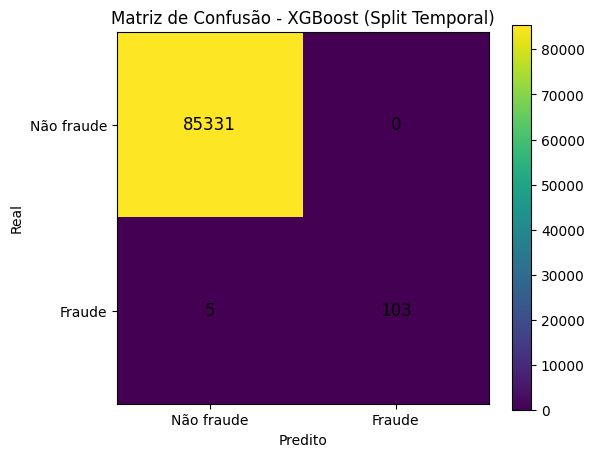

In [35]:
cm = confusion_matrix(
    y_test_t,
    (y_proba_xgb >= threshold_xgb).astype(int)
)

labels = ["Não fraude", "Fraude"]

plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.colorbar()

plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - XGBoost (Split Temporal)")

# Escrever os valores dentro das células
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=12)

plt.show()

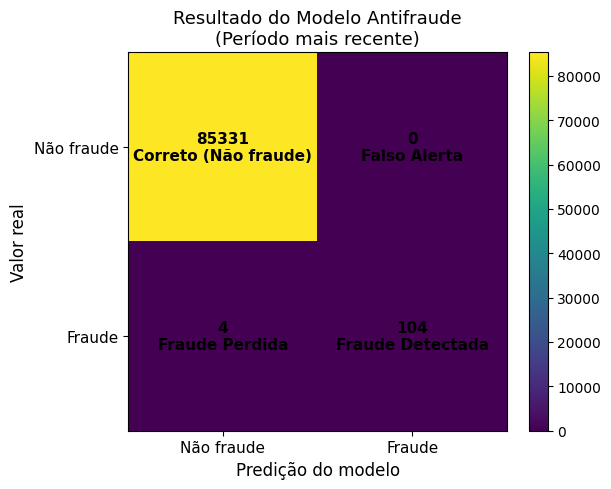

In [36]:
import matplotlib.pyplot as plt
import numpy as np

cm = np.array([[85331, 0],
               [4, 104]])

labels = ["Não fraude", "Fraude"]

plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.colorbar(fraction=0.046)

plt.xticks([0, 1], labels, fontsize=11)
plt.yticks([0, 1], labels, fontsize=11)

plt.xlabel("Predição do modelo", fontsize=12)
plt.ylabel("Valor real", fontsize=12)
plt.title("Resultado do Modelo Antifraude\n(Período mais recente)", fontsize=13)

# Anotações com explicação
descriptions = [
    ["Correto (Não fraude)", "Falso Alerta"],
    ["Fraude Perdida", "Fraude Detectada"]
]

for i in range(2):
    for j in range(2):
        plt.text(
            j, i,
            f"{cm[i, j]}\n{descriptions[i][j]}",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold"
        )

plt.tight_layout()
plt.show()



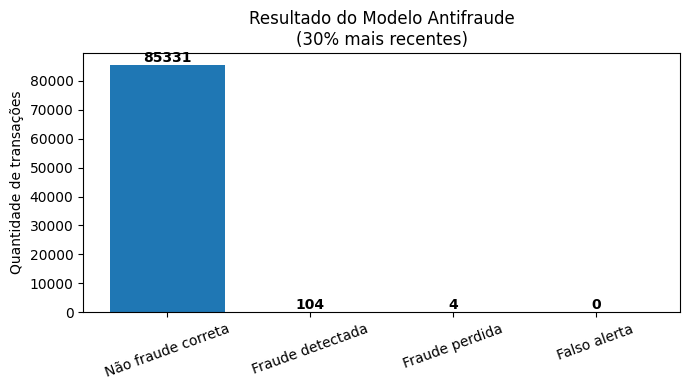

In [37]:
labels = [
    "Não fraude correta",
    "Fraude detectada",
    "Fraude perdida",
    "Falso alerta"
]

values = [
    85331,
    104,
    4,
    0
]

plt.figure(figsize=(7, 4))
plt.bar(labels, values)

plt.title("Resultado do Modelo Antifraude\n(30% mais recentes)")
plt.ylabel("Quantidade de transações")

plt.xticks(rotation=20)

# Valores em cima das barras
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()


In [38]:
import plotly.express as px
import pandas as pd
import numpy as np

cm = np.array([[85331, 0],
               [4, 104]])

df_cm = pd.DataFrame(
    cm,
    index=["Não fraude", "Fraude"],
    columns=["Predito: Não fraude", "Predito: Fraude"]
)

fig = px.imshow(
    df_cm,
    text_auto=True,
    color_continuous_scale="Blues",
    aspect="auto"
)

fig.update_layout(
    title="Resultado do Modelo Antifraude<br><sup>Período mais recente (30% dos dados)</sup>",
    xaxis_title="Predição do modelo",
    yaxis_title="Valor real",
    font=dict(size=14)
)

fig.show()


In [39]:
df_bar = pd.DataFrame({
    "Categoria": [
        "Não fraude correta",
        "Fraude detectada",
        "Fraude perdida",
        "Falso alerta"
    ],
    "Quantidade": [
        85331,
        104,
        4,
        0
    ]
})

fig = px.bar(
    df_bar,
    x="Categoria",
    y="Quantidade",
    text="Quantidade"
)

fig.update_layout(
    title="Resumo do Desempenho do Modelo Antifraude<br><sup>30% mais recentes</sup>",
    xaxis_title="",
    yaxis_title="Número de transações",
    font=dict(size=14)
)

fig.show()
